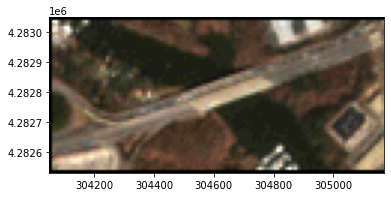

EPSG:32618


In [3]:
import os
import rasterio
from rasterio.plot import show
from rasterio.features import shapes
import numpy as np
import matplotlib.pyplot as plt

# Import, transform and show image + CRS data
my_image = rasterio.open('clipped.tif')

show(my_image.read(), transform=my_image.transform) # raster coordinates to actual coordinates 
print(my_image.crs)



In [10]:
# Parse data
red = my_image.read(1)
green = my_image.read(2)
blue = my_image.read(3)
red, green, blue

(array([[  0,   0,   0, ...,   0,   0,   0],
        [  0, 253, 252, ..., 100,  92, 136],
        [  0, 208, 204, ..., 125, 125, 150],
        ...,
        [  0, 173, 165, ..., 189, 165, 133],
        [  0, 145, 151, ..., 145, 133, 116],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0, 229, 255, ...,  91,  82, 129],
        [  0, 173, 208, ..., 101, 103, 114],
        ...,
        [  0, 154, 146, ..., 171, 147, 111],
        [  0, 124, 132, ..., 126, 112, 107],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8),
 array([[  0,   0,   0, ...,   0,   0,   0],
        [  0, 225, 231, ...,  74,  73, 103],
        [  0, 145, 183, ...,  97,  90,  90],
        ...,
        [  0, 121, 113, ..., 133, 109,  98],
        [  0, 107,  99, ...,  96,  91,  90],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8))

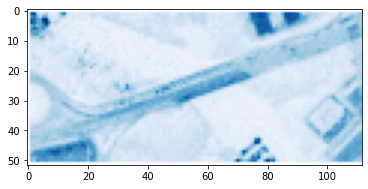

<AxesSubplot:>

In [11]:
# Blue Band
show(blue, cmap='Blues')

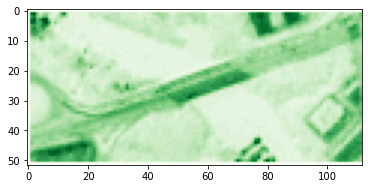

<AxesSubplot:>

In [12]:
# Green Band
show(green, cmap='Greens')

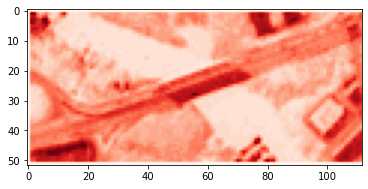

<AxesSubplot:>

In [13]:
# Red Band
show(red, cmap='Reds')

In [16]:
# Convert bands to floats

red = np.float32(red)
green = np.float32(green)
blue = np.float32(blue)
red, green, blue

(array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0., 253., 252., ..., 100.,  92., 136.],
        [  0., 208., 204., ..., 125., 125., 150.],
        ...,
        [  0., 173., 165., ..., 189., 165., 133.],
        [  0., 145., 151., ..., 145., 133., 116.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0., 229., 255., ...,  91.,  82., 129.],
        [  0., 173., 208., ..., 101., 103., 114.],
        ...,
        [  0., 154., 146., ..., 171., 147., 111.],
        [  0., 124., 132., ..., 126., 112., 107.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=float32),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0., 225., 231., ...,  74.,  73., 103.],
        [  0., 145., 183., ...,  97.,  90.,  90.],
        ...,
        [  0., 121., 113., ..., 133., 109.,  98.],
        [  0., 107.,  99., ...,  96.,  91.,  90.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]], dtype=fl

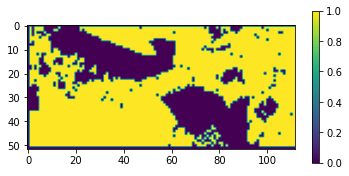

In [18]:
# Create array and plot

water_index = np.zeros(blue.shape)
water_index[(red > green) |  (red > 70) & (red < 120)] = 1
plt.imshow(water_index)
plt.colorbar(shrink=.7)

In [21]:
# Convert from float64 to float32 
water_index = water_index.astype('float32')

# Numpy array to geojson
my_shapes = shapes(water_index)

# View geojson
for my_shape in my_shapes:
    print(my_shape)
    break 

({'type': 'Polygon', 'coordinates': [[(13.0, 1.0), (13.0, 2.0), (14.0, 2.0), (14.0, 1.0), (13.0, 1.0)]]}, 1.0)


In [22]:
# Output location
output_folder = 'shapes'
if not os.path.exists(output_folder):
    os.mkdir(output_folder) # If not, then make the directory
    
# Transform raster to geo coordinates
def transform_coordinates(pair):
    """
    This function takes a pair of raster coordinates 
    and returns the geographic coordinates. 
    
    """
    geographic_coordinates = my_image.xy(pair[1],pair[0])
    
    return geographic_coordinates


In [23]:
# For loop over shapes
for river in my_shapes:
    
   
    print('These are the original raster coordinates:')
    print(river[0]['coordinates'])
    print('--')
    
  
    coordinates = [transform_coordinates(pair) for pair in river[0]['coordinates'][0]]
    
    
    print('Whereas these are the transformed geographic coordinates:')
    print(coordinates)
    
    break

These are the original raster coordinates:
[[(79.0, 1.0), (79.0, 2.0), (80.0, 2.0), (80.0, 1.0), (79.0, 1.0)]]
--
Whereas these are the transformed geographic coordinates:
[(304845.0, 4283035.0), (304845.0, 4283025.0), (304855.0, 4283025.0), (304855.0, 4283035.0), (304845.0, 4283035.0)]


In [24]:
import sys
!conda install --yes --prefix {sys.prefix} geopandas

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.11.0
  latest version: 4.12.0

Please update conda by running

    $ conda update -n base -c defaults conda




In [25]:
# Create new data frame and for loop over shapes again
output = []

for river_shape in my_shapes:


    coords = river_shape[0]['coordinates'][0]
    print(coords)

    geographic_coords = [transform_coordinates(pair) for pair in coords]

   
    output.append({
        'geometry' : {
            'type':'LineString',
            'coordinates': geographic_coords
            },
        'properties': {},
    }) 
        
print('Output contains {} shapes'.format(len(output)))

[(11.0, 2.0), (11.0, 3.0), (13.0, 3.0), (13.0, 2.0), (11.0, 2.0)]
[(82.0, 2.0), (82.0, 4.0), (84.0, 4.0), (84.0, 3.0), (83.0, 3.0), (83.0, 2.0), (82.0, 2.0)]
[(100.0, 2.0), (100.0, 3.0), (101.0, 3.0), (101.0, 2.0), (100.0, 2.0)]
[(4.0, 3.0), (4.0, 4.0), (6.0, 4.0), (6.0, 5.0), (8.0, 5.0), (8.0, 4.0), (7.0, 4.0), (7.0, 3.0), (4.0, 3.0)]
[(7.0, 3.0), (7.0, 4.0), (8.0, 4.0), (8.0, 3.0), (7.0, 3.0)]
[(61.0, 3.0), (61.0, 4.0), (62.0, 4.0), (62.0, 3.0), (61.0, 3.0)]
[(105.0, 3.0), (105.0, 4.0), (107.0, 4.0), (107.0, 3.0), (105.0, 3.0)]
[(95.0, 4.0), (95.0, 5.0), (96.0, 5.0), (96.0, 4.0), (95.0, 4.0)]
[(5.0, 5.0), (5.0, 6.0), (6.0, 6.0), (6.0, 5.0), (5.0, 5.0)]
[(96.0, 5.0), (96.0, 6.0), (97.0, 6.0), (97.0, 5.0), (96.0, 5.0)]
[(100.0, 6.0), (100.0, 7.0), (101.0, 7.0), (101.0, 6.0), (100.0, 6.0)]
[(77.0, 7.0), (77.0, 8.0), (78.0, 8.0), (78.0, 7.0), (77.0, 7.0)]
[(74.0, 9.0), (74.0, 10.0), (75.0, 10.0), (75.0, 9.0), (74.0, 9.0)]
[(73.0, 10.0), (73.0, 11.0), (74.0, 11.0), (74.0, 10.0), (73.0, 10

In [26]:
import geopandas

data_to_write = geopandas.GeoDataFrame.from_features(output, crs='epsg:4326')

data_to_write.to_file('shapes/river_shape.shp')

C:\Users\15714\anaconda3\envs\sia\lib\site-packages\geopandas\io\file.py:362: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  pd.Int64Index,


In [27]:
# Visually inspect data frame
data = geopandas.read_file('shapes/river_shape.shp')
print(data)
print('----')
print('In this dataframe we have {} shapes.'.format(len(data)))

    FID                                           geometry
0     0  LINESTRING (304165.00000 4283025.00000, 304165...
1     1  LINESTRING (304875.00000 4283025.00000, 304875...
2     2  LINESTRING (305055.00000 4283025.00000, 305055...
3     3  LINESTRING (304095.00000 4283015.00000, 304095...
4     4  LINESTRING (304125.00000 4283015.00000, 304125...
..  ...                                                ...
83   83  LINESTRING (304785.00000 4282555.00000, 304785...
84   84  LINESTRING (304825.00000 4282555.00000, 304825...
85   85  LINESTRING (304855.00000 4282555.00000, 304855...
86   86  LINESTRING (304825.00000 4282545.00000, 304825...
87   87  LINESTRING (304885.00000 4282545.00000, 304885...

[88 rows x 2 columns]
----
In this dataframe we have 88 shapes.


<AxesSubplot:>

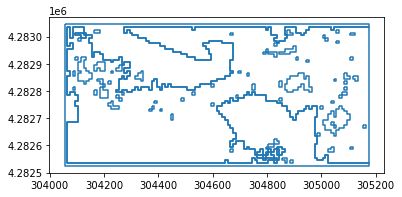

In [29]:
# Plot object extraction
# This is note code from the notebook, that code showed an error "ValueError: 'box_aspect' and 'fig_aspect' must be positive"
# What does that mean and was this an appropriate way to work around it?
gdf= geopandas.read_file('shapes/river_shape.shp')

gdf.plot(aspect=1)